In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df_score = pd.read_csv("../Feature_selection/ft_important.csv")
df_score.drop(columns=["Unnamed: 0"], inplace=True)
df_score

,index,Features,Scores
0,116,118,0.051969
1,181,183,0.051825
2,60,62,0.049422
3,195,197,0.044167
4,96,98,0.043881
...,...,...,...
190,73,75,0.000013
191,211,213,0.000013
192,70,72,0.000011
193,93,95,0.000010


In [3]:
df_score["index"].values 

array([116, 181,  60, 195,  96, 136,   2, 152, 168,   1, 151,  76, 135,
       182,  40, 196,  21,  22, 170, 154, 194, 184,  39, 115,   4,  38,
        61, 198,  95, 183,  59, 137,  31, 169, 153, 180, 138,   3, 134,
       145, 197, 167,  23, 117, 118,  98,  24,  77,  78,  20,  94, 109,
        11,  62,  33,  97, 128,  35,  42, 146,  15,  16, 162, 158,  75,
        41, 205, 202,  28,  34, 148,  17, 189, 142,   5,  29, 174,  14,
       131,  74,  55, 191, 110,  32,   0, 166, 108, 125,  79, 129, 130,
        53, 150, 185, 164, 160, 155,  30,  12, 171,  88, 114, 199, 144,
       104, 149, 175, 147, 188, 102, 107,  91, 161,  37,   9, 111,  63,
       124, 200, 186, 105, 159, 206, 119, 203,  13, 133, 178, 103,  47,
       123,  19, 106,  52, 190,  58, 139,   7,  43,  25,  72, 126,  69,
        49,  48,  10, 100, 127,  85,  80,  86, 210,  54,  44,  90,  99,
       179,  26,  51, 132, 208,  83, 176, 157, 172, 140, 192,  36,  71,
       141,  18,  64,  87,  68, 207,  84,  81, 156, 122,  67,   

In [103]:
df_score[df_score["index"] == 0]

,index,Features,Scores
84,0,2,0.000491


In [104]:
df_score["Scores"].values

array([5.19689985e-02, 5.18246747e-02, 4.94218848e-02, 4.41671430e-02,
       4.38811585e-02, 4.03799799e-02, 3.74673762e-02, 3.57353090e-02,
       3.48713687e-02, 3.09943466e-02, 3.09405326e-02, 3.03716843e-02,
       2.55201550e-02, 2.54071527e-02, 2.52945346e-02, 2.50757547e-02,
       2.11646913e-02, 2.05128248e-02, 2.00165862e-02, 1.77962312e-02,
       1.69675024e-02, 1.57791574e-02, 1.46609554e-02, 1.26505979e-02,
       1.22327995e-02, 1.20738013e-02, 1.20198411e-02, 1.14802629e-02,
       1.09465541e-02, 1.05439461e-02, 1.02223980e-02, 8.87954118e-03,
       8.75259418e-03, 8.65524544e-03, 8.41784225e-03, 8.30704179e-03,
       8.19566958e-03, 7.97599203e-03, 7.69019886e-03, 6.89933746e-03,
       6.59076846e-03, 6.40441187e-03, 6.39753082e-03, 6.33181013e-03,
       5.79961873e-03, 5.49326791e-03, 5.23740774e-03, 4.73085137e-03,
       4.37046464e-03, 4.24369728e-03, 4.17564127e-03, 3.33456722e-03,
       2.98127341e-03, 2.92721490e-03, 2.83974601e-03, 2.76284083e-03,
      

In [4]:
ranks = [df_score[df_score["Scores"] > 1e-2]['Features'].values, df_score[df_score["Scores"] > 1e-3]['Features'].values, df_score[df_score["Scores"] > 1e-4]['Features'].values, df_score[df_score["Scores"] > 1e-5]['Features'].values, df_score[df_score["Scores"] > 1e-6]['Features'].values]

In [12]:
df_train = pd.read_csv("../data_train_frequency.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,1,2,3,4,5,6,7,8,9,10,...,204,205,206,207,208,209,210,211,212,213
0,0.0,10.0,950.000000,1074.0,274.986868,782.0,-0.319753,-1.432466,325.821586,1.000000,...,1.000000,172.000000,10.000000,9.000000,252.222222,10656.395062,87.777778,10339.061728,135.800000,4315.560000
1,0.0,17.0,574.500000,582.0,104.913059,378.0,0.158313,-0.696295,336.569414,1.000000,...,0.882353,-15.000000,15.000000,4.000000,158.000000,3944.000000,73.000000,6555.000000,-1.066667,697.528889
2,3.0,16.0,593.600000,594.0,4.687572,18.0,0.396421,-0.312612,94.909877,1.000000,...,1.000000,-4.000000,16.000000,15.000000,122.400000,2058.773333,12.533333,1360.782222,95.500000,68.750000
3,3.0,23.0,420.090909,420.0,3.591772,12.0,-0.021014,-0.856142,254.059787,0.826087,...,0.739130,-9.000000,6.000000,4.000000,40.666667,1120.888889,5.333333,1504.888889,12.000000,1464.000000
4,1.0,9.0,1068.750000,1075.0,25.118469,76.0,-0.276816,-1.271399,461.130814,1.000000,...,1.000000,2.000000,9.000000,8.000000,122.000000,671.000000,19.750000,569.437500,136.444444,43.358025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,3.0,16.0,615.733333,596.0,51.114860,152.0,2.153820,2.645687,365.256750,1.000000,...,0.003757,0.022262,0.003757,0.003757,0.044242,0.044242,0.043021,0.043021,0.037385,0.037385
8512,1.0,9.0,1091.500000,1093.0,5.894913,18.0,-0.311206,-1.184514,358.414529,1.000000,...,0.888889,-3.000000,9.000000,8.000000,81.428571,1294.530612,-40.000000,1746.285714,155.333333,4722.666667
8513,2.0,15.0,654.428571,648.0,107.653355,458.0,0.475616,0.784000,180.045117,1.000000,...,1.000000,-4.000000,15.000000,14.000000,77.142857,2213.551020,-1.714286,2686.204082,104.000000,3602.666667
8514,1.0,9.0,1075.000000,1083.0,24.535688,66.0,-0.263431,-1.567800,251.455499,1.000000,...,1.000000,14.000000,9.000000,8.000000,101.142857,4933.551020,-10.750000,7259.937500,88.222222,202.172840


In [7]:
(ranks[3])

array([118, 183,  62, 197,  98, 138,   4, 154, 170,   3, 153,  78, 137,
       184,  42, 198,  23,  24, 172, 156, 196, 186,  41, 117,   6,  40,
        63, 200,  97, 185,  61, 139,  33, 171, 155, 182, 140,   5, 136,
       147, 199, 169,  25, 119, 120, 100,  26,  79,  80,  22,  96, 111,
        13,  64,  35,  99, 130,  37,  44, 148,  17,  18, 164, 160,  77,
        43, 207, 204,  30,  36, 150,  19, 191, 144,   7,  31, 176,  16,
       133,  76,  57, 193, 112,  34,   2, 168, 110, 127,  81, 131, 132,
        55, 152, 187, 166, 162, 157,  32,  14, 173,  90, 116, 201, 146,
       106, 151, 177, 149, 190, 104, 109,  93, 163,  39,  11, 113,  65,
       126, 202, 188, 107, 161, 208, 121, 205,  15, 135, 180, 105,  49,
       125,  21, 108,  54, 192,  60, 141,   9,  45,  27,  74, 128,  71,
        51,  50,  12, 102, 129,  87,  82,  88, 212,  56,  46,  92, 101,
       181,  28,  53, 134, 210,  85, 178, 159, 174, 142, 194,  38,  73,
       143,  20,  66,  89,  70, 209,  86,  83, 158, 124,  69,   

In [10]:
best_ft = ranks[3]-1

In [13]:
y_train = df_train.iloc[:,0].values

In [11]:
df_train = df_train.iloc[:,best_ft]

IndexError: positional indexers are out-of-bounds

In [15]:
x_train = df_train.values

In [16]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)

In [17]:
df_test = pd.read_csv("../data_test_frequency.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,203,204,205,206,207,208,209,210,211,212
0,0.0,14.0,710.769231,628.0,153.204817,556.0,0.996355,0.207174,459.037295,1.000000,...,0.928571,-10.000000,10.0,9.0,146.000000,729.000000,78.250000,3140.437500,127.600000,1041.440000
1,0.0,10.0,968.666667,894.0,266.399867,932.0,0.979352,0.388359,398.464564,1.000000,...,0.600000,64.000000,7.0,7.0,140.500000,15314.750000,-27.000000,5249.000000,112.285714,8081.632653
2,0.0,11.0,797.000000,780.0,251.329664,794.0,0.260470,-1.002325,340.802438,1.000000,...,1.000000,26.000000,9.0,7.0,154.285714,1944.489796,18.571429,8070.530612,131.111111,1078.320988
3,2.0,13.0,757.500000,755.0,8.986100,26.0,0.048579,-1.449012,412.324324,1.000000,...,1.000000,-4.000000,12.0,12.0,108.500000,6122.750000,46.500000,7081.416667,121.833333,264.305556
4,0.0,23.0,413.909091,409.0,82.344017,426.0,3.023659,10.404884,168.041577,0.956522,...,0.083333,0.022262,11.0,12.0,0.044242,0.044242,-50.000000,0.000000,45.818182,832.330579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,1.0,9.0,1071.250000,1062.0,36.509417,118.0,1.263183,0.543003,364.303573,0.888889,...,0.777778,0.000000,9.0,8.0,342.857143,2843.265306,205.142857,11207.836735,96.000000,2281.142857
2126,1.0,8.0,1196.000000,1202.0,33.839959,102.0,-0.454057,-1.036905,181.876516,1.000000,...,1.000000,-26.000000,8.0,7.0,137.666667,228.555556,87.714286,14282.775510,169.142857,46.693878
2127,3.0,16.0,595.600000,590.0,23.734082,82.0,0.371174,-0.657132,137.696567,1.000000,...,1.000000,-8.000000,16.0,14.0,102.714286,1270.061224,7.285714,361.489796,90.400000,2186.240000
2128,1.0,8.0,1080.285714,996.0,180.470587,448.0,0.587475,-1.363827,561.988537,1.000000,...,1.000000,18.000000,8.0,5.0,62.400000,51.840000,-45.200000,0.960000,101.000000,5002.000000


In [18]:
y_test = df_test.iloc[:,0].values

In [19]:
df_test = df_test.iloc[:,best_ft]
x_test = df_test.values


In [20]:
x_test = scale.transform(x_test)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train , test_size=0.5, shuffle=True, stratify=y_train, random_state=119)
print(f"Train: {x_train.shape}")
print(f"Vallidation: {x_val.shape}")

Train: (4258, 31)
Vallidation: (4258, 31)


In [22]:
rf_clf = RandomForestClassifier(criterion= 'log_loss', max_depth= 5, max_features= 'sqrt', n_estimators= 1500)
ab_clf = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 0.1, n_estimators= 1000)
knn_clf = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')
svc_clf = SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)
xgb_clf = XGBClassifier(gamma= 0,learning_rate= 0.1,max_depth= 5,min_child_weight= 1,n_estimators= 1000)
dt_clf = DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')
lgb_clf = LGBMClassifier(boosting = 'gbdt', data_sample_strategy= 'goss', estimators=50, learning_rate = 0.1, objective= 'multiclass')
cb_clf = CatBoostClassifier(iterations = 300, learning_rate= 1)
gb_clf = GradientBoostingClassifier(criterion='squared_error', learning_rate = 0.1, loss= 'log_loss', n_estimators=400)

In [23]:
# Huấn luyện các mô hình con
ab_clf.fit(x_train, y_train)
cb_clf.fit(x_train, y_train)
gb_clf.fit(x_train, y_train)
# rf_clf.fit(x_train, y_train)
xgb_clf.fit(x_train,y_train)
lgb_clf.fit(x_train,y_train)

0:	learn: 0.3864815	total: 160ms	remaining: 47.9s
1:	learn: 0.3031278	total: 173ms	remaining: 25.8s
2:	learn: 0.2757458	total: 183ms	remaining: 18.1s
3:	learn: 0.2639367	total: 193ms	remaining: 14.3s
4:	learn: 0.2507312	total: 217ms	remaining: 12.8s
5:	learn: 0.2462128	total: 227ms	remaining: 11.1s
6:	learn: 0.2380394	total: 238ms	remaining: 9.94s
7:	learn: 0.2282590	total: 247ms	remaining: 9s
8:	learn: 0.2247326	total: 257ms	remaining: 8.29s
9:	learn: 0.2205787	total: 266ms	remaining: 7.7s
10:	learn: 0.2171169	total: 276ms	remaining: 7.25s
11:	learn: 0.2093058	total: 287ms	remaining: 6.88s
12:	learn: 0.2054064	total: 297ms	remaining: 6.55s
13:	learn: 0.2025478	total: 307ms	remaining: 6.28s
14:	learn: 0.1946238	total: 317ms	remaining: 6.03s
15:	learn: 0.1932395	total: 327ms	remaining: 5.8s
16:	learn: 0.1905312	total: 337ms	remaining: 5.6s
17:	learn: 0.1874070	total: 347ms	remaining: 5.43s
18:	learn: 0.1843102	total: 356ms	remaining: 5.27s
19:	learn: 0.1807587	total: 366ms	remaining: 5.

LGBMClassifier(boosting='gbdt', data_sample_strategy='goss', estimators=50,
               objective='multiclass')

In [24]:
# Dự đoán trên tập huấn luyện để tạo đặc trưng mới cho mô hình blending
X_train_meta = np.column_stack((
    # rf_clf.predict_proba(x_val),
    ab_clf.predict_proba(x_val),
    cb_clf.predict_proba(x_val),
    gb_clf.predict_proba(x_val),
    xgb_clf.predict_proba(x_val),
    lgb_clf.predict_proba(x_val)
))
# Dự đoán trên tập kiểm tra để tạo đặc trưng mới cho mô hình blending
X_test_meta = np.column_stack((
    # rf_clf.predict_proba(x_test),
    ab_clf.predict_proba(x_test),
    cb_clf.predict_proba(x_test),
    gb_clf.predict_proba(x_test),
    xgb_clf.predict_proba(x_test),
    lgb_clf.predict_proba(x_test)
))

[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] Unknown parameter: estimators
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


In [25]:
print(f"X_train_meta:{X_train_meta.shape}")
print(f"X_test_meta:{X_test_meta.shape}")

X_train_meta:(4258, 20)
X_test_meta:(2130, 20)


In [26]:
pd.DataFrame(y_test)

,0
0,0.0
1,0.0
2,0.0
3,2.0
4,0.0
...,...
2125,1.0
2126,1.0
2127,3.0
2128,1.0


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
params = {
    'n_estimators': [10,50,100,200,300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [4,5,6,7],
    'max_features':['sqrt', 'log2'],
    'class_weight':['balanced', 'balanced_subsample']
}
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, verbose=5, return_train_score=True,refit=True)
grid_model = grid_search.fit(X_train_meta,y_val)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=10;, score=(train=0.933, test=0.921) total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=10;, score=(train=0.933, test=0.925) total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=10;, score=(train=0.931, test=0.923) total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=(train=0.936, test=0.921) total time=   0.2s
[CV 2/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=(train=0.932, test=0.930) total time=   0.2s
[CV 3/3] END class_weight=balanced, criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=(train=0.929, test=0.927) total time=   0.2s
[CV 1/3] END class_

In [28]:
result_test = grid_model.predict(X_test_meta)

In [29]:
grid_model.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [30]:
grid_model.best_score_

0.9286069009783389

In [31]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

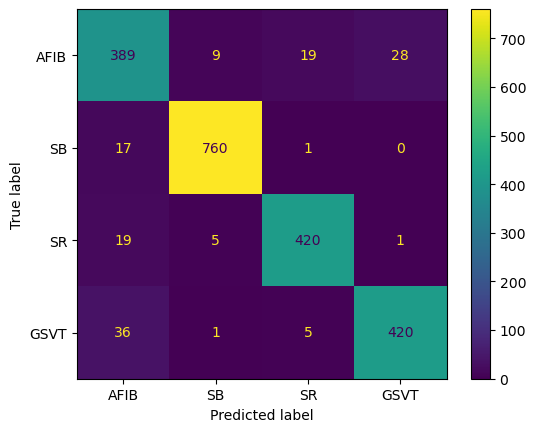

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.939906,0.874157,0.843818,0.858720,0.957270
1,SB,0.984507,0.976864,0.980645,0.978751,0.988905
2,SR,0.976526,0.943820,0.943820,0.943820,0.985163
3,GSVT,0.966667,0.909091,0.935412,0.922064,0.982614
4,macro avg,NaN,0.925839,0.925924,0.925983,NaN
5,micro avg,NaN,0.933803,0.933803,0.933803,NaN
6,weighted avg,NaN,0.934081,0.934555,0.933803,NaN


In [32]:
evaluation_test = evaluation_test(y_test,result_test)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [33]:
# df_evaluation_test.to_csv("../Result/Blending_RF_frequency_sf.csv")